# Spotify Song & Genre Analysis - 8
> Elif Aydın 28061

> Serra Tuncel 28007

> Okan Sarp Kaya 26546

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib as mpl

In [ ]:
from google.colab import drive
from os.path import join
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = "data.csv"  
path = "./drive/My Drive/CS210ProjectDatas"
df = pd.read_csv(join(path, filename))

filename2 = "data_by_artist.csv"  
path = "./drive/My Drive/CS210ProjectDatas"
df2 = pd.read_csv(join(path, filename2))

filename3 = "data_by_genres.csv"  
path = "./drive/My Drive/CS210ProjectDatas" 
df3 = pd.read_csv(join(path, filename3))

filename4 = "data_by_year.csv"  
path = "./drive/My Drive/CS210ProjectDatas"  
df4 = pd.read_csv(join(path, filename4))

filename5 = "data_w_genres.csv"   
path = "./drive/My Drive/CS210ProjectDatas"
df5 = pd.read_csv(join(path, filename5))

#Introduction

In this project, we are given a dataset which has many songs,artists,genres and the audio features. Our project consists of 3 sections: Exploratory Data Analysis, Statistical Tests & Hypothesis Testing and finally Machine Learning. 

#Exploratory Data Analysis

In this section, we will simply try to understand our data, get general statistics and get visualizations of general statistics. We will also try to visualize the things that we are interested in such as popularity of artists, tracks, audio feautures of popular artists, how the genres' audio feautures change within the year etc. We can then use the informations we gathered from this step such as how certain feautures contribute to the popularity of a song in Section2.

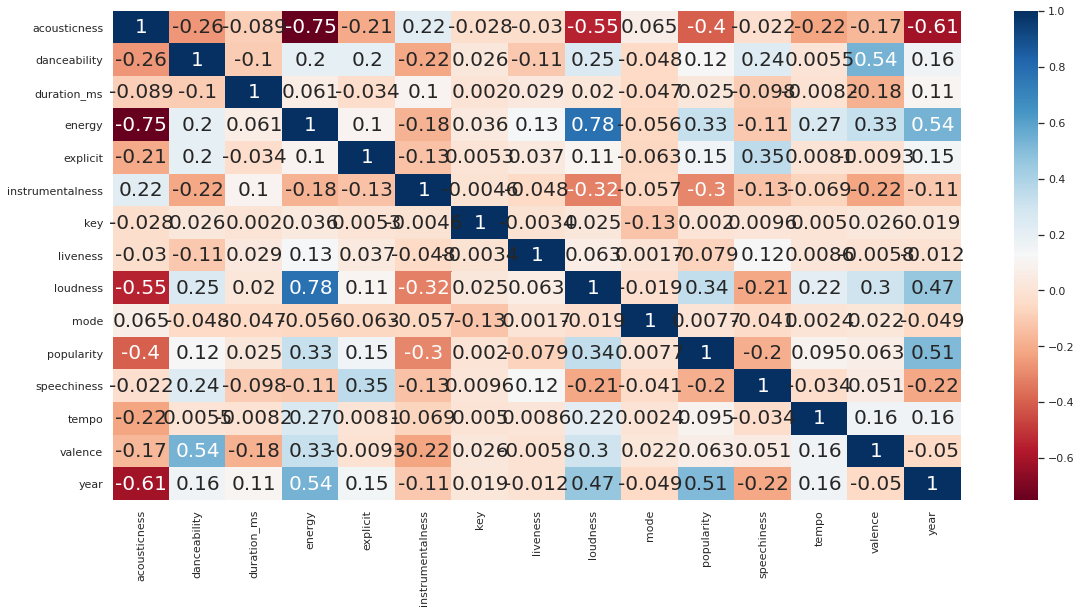

Important Findings from the Correlation Matrix:

1.   Acousticness and Energy are negatively correlated -0.75
2.   Acousticnes and Year are negatively correlated, -0.61 suggest that new songs have relatively low acousticnes
3.   Danceability and Valence are positively correlated 0.64
4.   Energy and Loudness are positively correlated (high) 0.78
5.   Energy and Year are positively correlated 0.54 suggest that new songs have relatively more energy
6.   Loudness and Year are potively correlated (weak) new songs have more loudness compared to olders
7.   Year and Popularity are positively correlated (moderate) 0.51, newer songs are listened more
8. Popularity is positively correlated with energy and loudness, year (0.33 and 0.34, 0.54) and popularity is negatively correlated with acousticness and instrumentalness (-0.4, -0.3)

By examining the correlation matrix and the findings, it can be concluded that acousticness of the songs decrease and energy of the songs increase as the years pass by. Furthermore, newer songs are more popular. Thus songs with low acousticness and high energy are more popular.


## Popularity and Time Relation

As seen on the correlation matrix popularity increases as the year grows. 2020 has the leading place in popularity.

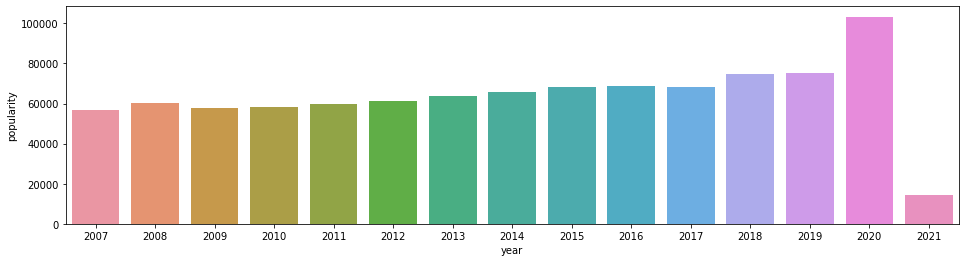

When it comes to the number of tracks released, 2010's are also the most productive years!

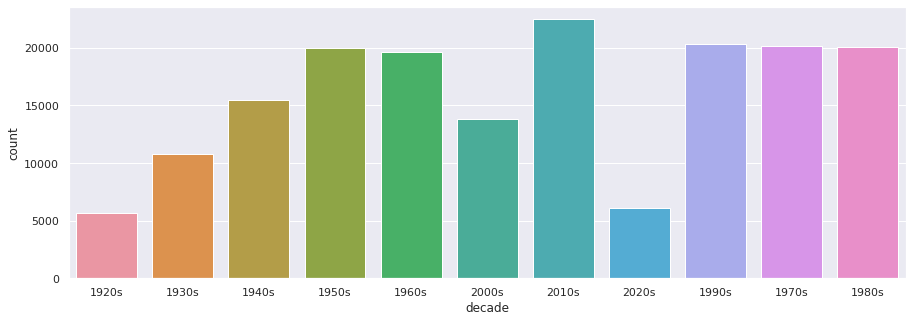

## Change in the Features of all Genres

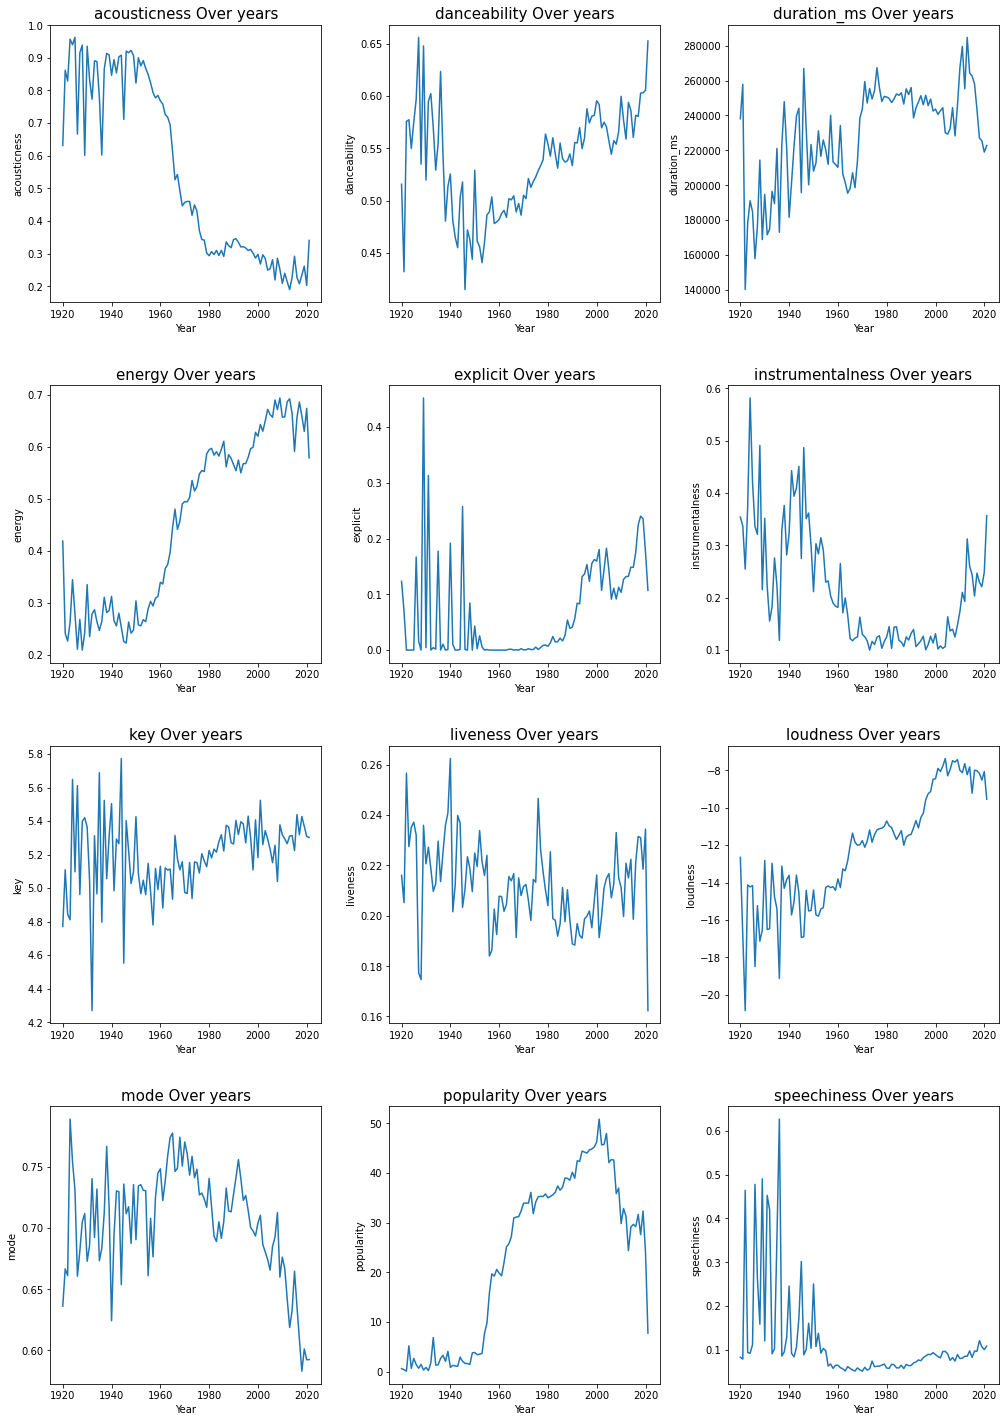

From the graph it is clear to see that while acousticness experiences a drastic drop, the loudness and energy of the tracks gets significantly higher.

There seems to be a rise in explicit content after 2000's, lets examine closer.

*This pie chart represents the explicit/not explicit ratio of the* **whole dataset**

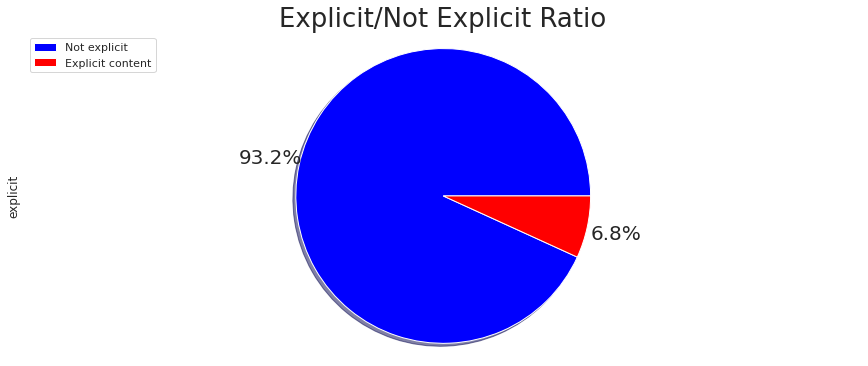

*This pie chart represents only the data from*  **2000 and after**

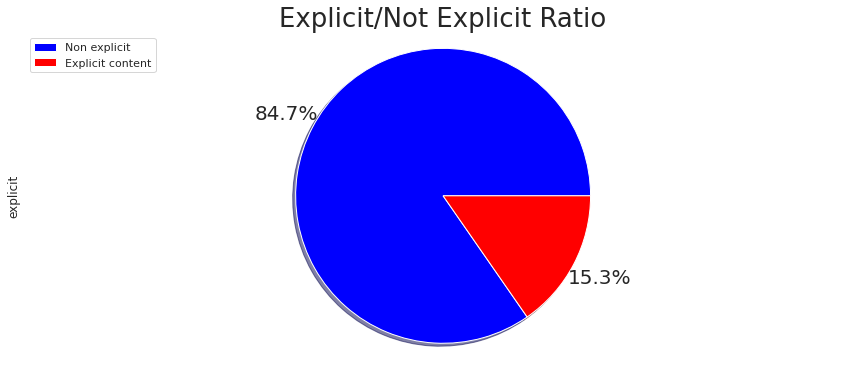

**It is clear to see that the ratio of explicit content has been increasing since the 2000's.**

## Most Popular Songs and Artists

**Most Popular Tracks**

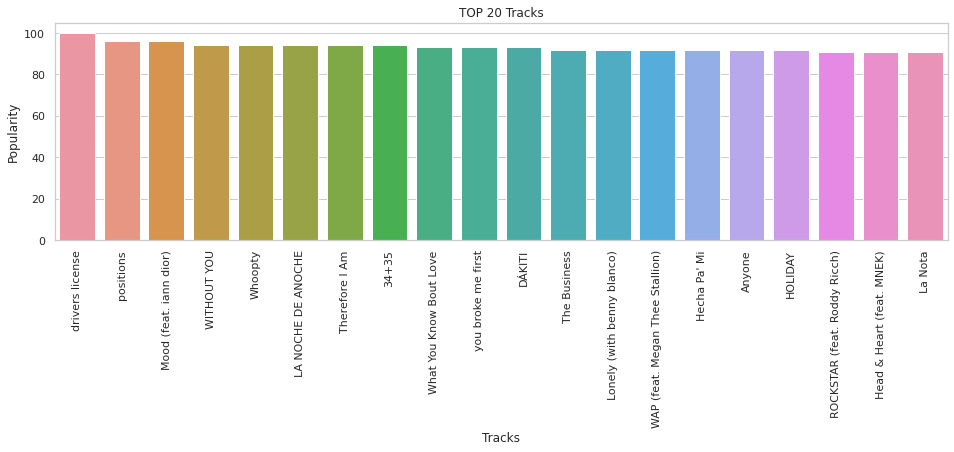

*Driver's Licence is the most popular song.*

**Most Popular Artists**

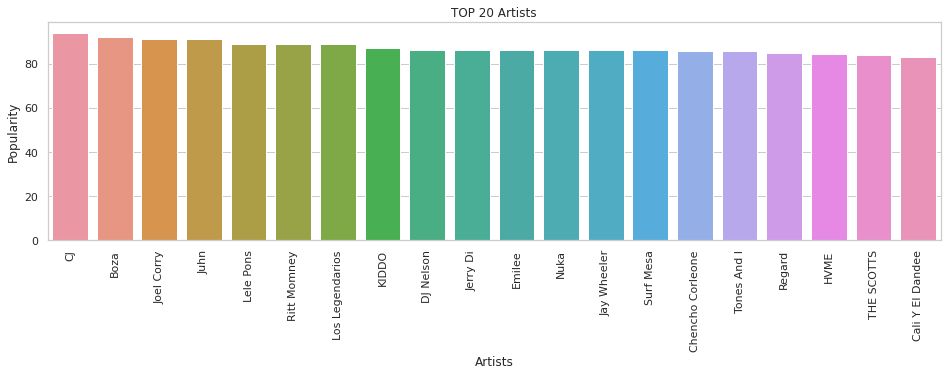

*Most Popular Artist is CJ.*

Lets take a look at the audio features of the most popular artists;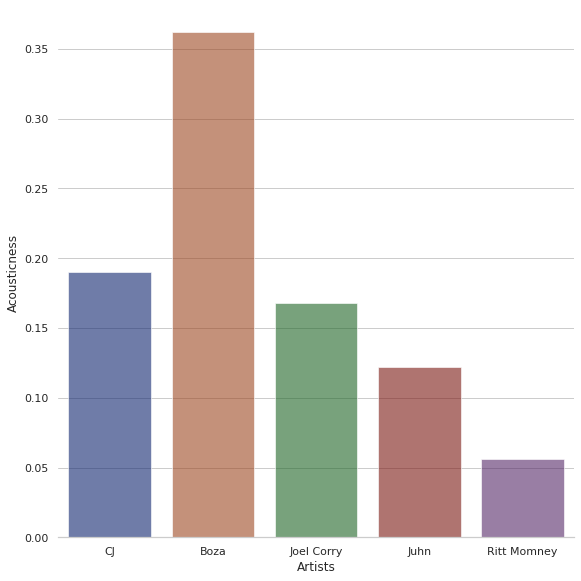

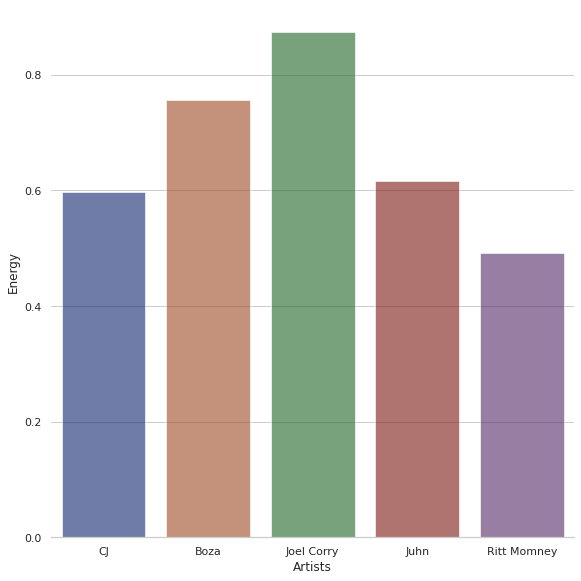

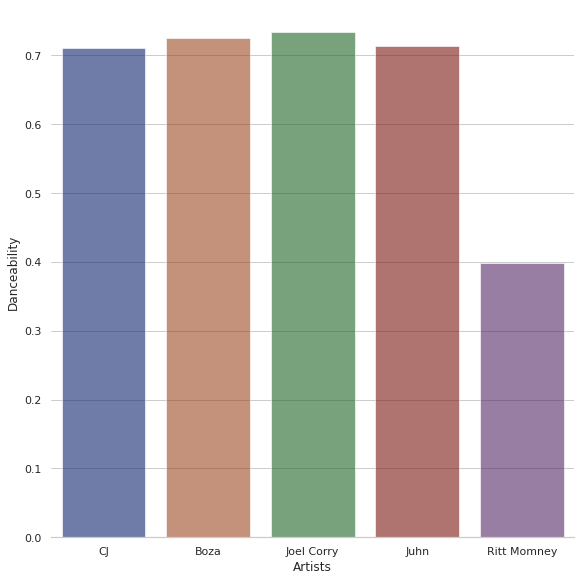

#Statistical Analysis & Hypothesis Testing

In this part, we will make some statistical tests to check features contributition to popularity of songs and we will also make statistical tests to differentiate specific eras. We will try to explain the reasons behind. Furthermore, the genre rock will be analyzed in different time periods. Lastly,  we want to see how inovations lead to changes in genres between eras.

##Statistical tests to check how features contribute to popularity of songs

In [ ]:
from sklearn import datasets
from scipy import stats
from scipy.stats import ttest_1samp

###Popularity vs Acousticness

From the pairwise correlation matrix, we know that popularity is negatively correlated with acousticness. We expect songs with high acousticness to have lower popularity rating.

Hypothesis Test: We want to test whether acousticness of a song affects popularity.

**Null Hypothesis ($H_0$)**: Acousticness does not affect popularity.

**Alternative Hypothesis ($H_A$)**: Acousticness affects popularity.

**We will split the dataframe to 2 samples. Sample1 has higher popularity than the mean popularity of the whole dataset. Sample2 has lower popularity than the mean popularity of the whole dataset.**

In [ ]:
sample1 = df[df.popularity > df['popularity'].mean()]
sample2=df[df.popularity <= df['popularity'].mean()] 

**High popularity group's acousticness is lower, the arrow points to mean acousticness value from sample1. As it is seen, it is low.**

In [ ]:
mean=df['acousticness'].mean()
sample_mean=sample1['acousticness'].mean()
std=df['acousticness'].std()
z_score = (sample_mean- mean) / std
print("Mean of Acousticness of whole data set ",df['acousticness'].mean()) 
print("Mean of Acousticness of sample1 (Higher popularity group)",sample1['acousticness'].mean()) 
print("Sample1's acousticness (Higher popularity group) deviate",z_score,"from the whole data set") 

Mean of Acousticness of whole data set  0.49922848176599677
Mean of Acousticness of sample1 (Higher popularity group) 0.35535808842527133
Sample1's acousticness (Higher popularity group) deviate -0.3786702318770541 from the whole data set


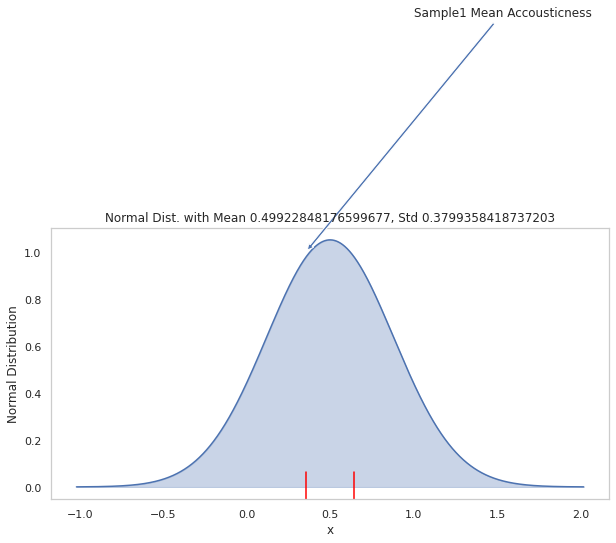

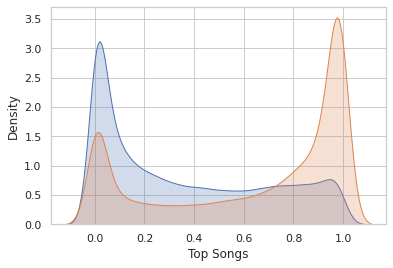

**The blue density graph belongs to sample1 and the pink graph belongs to sample2. As it is seen, the sample1 (high popularity group) has lower acousticness.**

In [ ]:
signifance=0.05
low_ac_group = sample1["acousticness"]
hig_ac_group = sample2["acousticness"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=low_ac_group, b=hig_ac_group, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis. Acousticness affects popularity")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. Acousticness does not affect popularity.")

P value:  0.00E+00
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis. Acousticness affects popularity


**We reject the null hytpothesis. Acousticness affects popularity and the difference in means are not due to chance. The correlation between popularity and acousticness is negative.**

###Popularity vs Energy

From the pairwise correlation matrix, we know that popularity is positively correlated with energy. We expect songs with high energy to have higher popularity rating.

Hypothesis Test: We want to test whether energy of a song affects popularity.

**Null Hypothesis ($H_0$)**: Energy does not affect popularity.

**Alternative Hypothesis ($H_A$)**: Energy affects popularity.

In [ ]:
mean=df['energy'].mean()
sample_mean=sample1['energy'].mean()
std=df['energy'].std()
z_score = (sample_mean- mean) / std
print("Mean of Energy of whole data set ",df['energy'].mean()) 
print("Mean of Energy of sample1 (Higher popularity group)",sample1['energy'].mean()) 
print("Sample1's energy (Higher popularity group) deviate",z_score,"from the whole data set") 

Mean of Energy of whole data set  0.4827208433255605
Mean of Energy of sample1 (Higher popularity group) 0.56598146737875
Sample1's energy (Higher popularity group) deviate 0.3053357446312481 from the whole data set


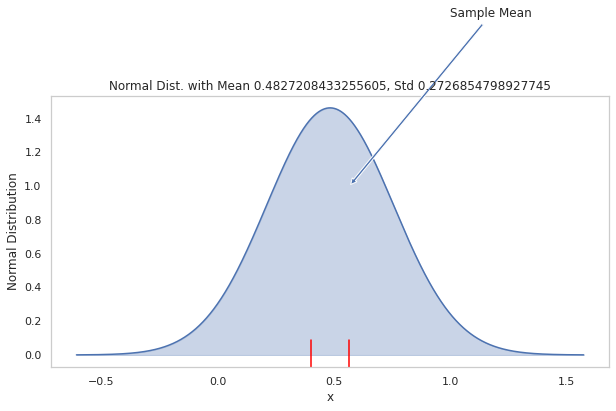

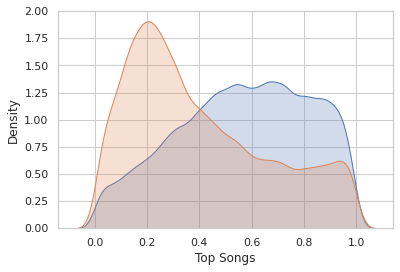

**Sample 1's energy is higher, the arrow points to red tick which corresponds to mean energy of sample1. In the other graph, the blue graph corresponds to sample1, pink is sample2. It can be seen that sample1 (high popularity group) has higher energy than sample2.**

In [ ]:
signifance=0.05
high_en_group = sample1["energy"]
low_en_group = sample2["energy"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=high_en_group, b=low_en_group, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis.Energy affects popularity")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. Energy does not affect popularity.")

P value:  0.00E+00
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis.Energy affects popularity


**We reject the null hypothesis, energy affects popularity of a song. The correlation is positive**

###Popularity vs Year

From the pairwise correlation matrix, we know that popularity is positively correlated with year. It means that latests songs tend to be more popular.

**Null Hypothesis ($H_0$)**: Songs release date does not affect popularity.

**Alternative Hypothesis ($H_A$)**: Songs release date affects popularity.

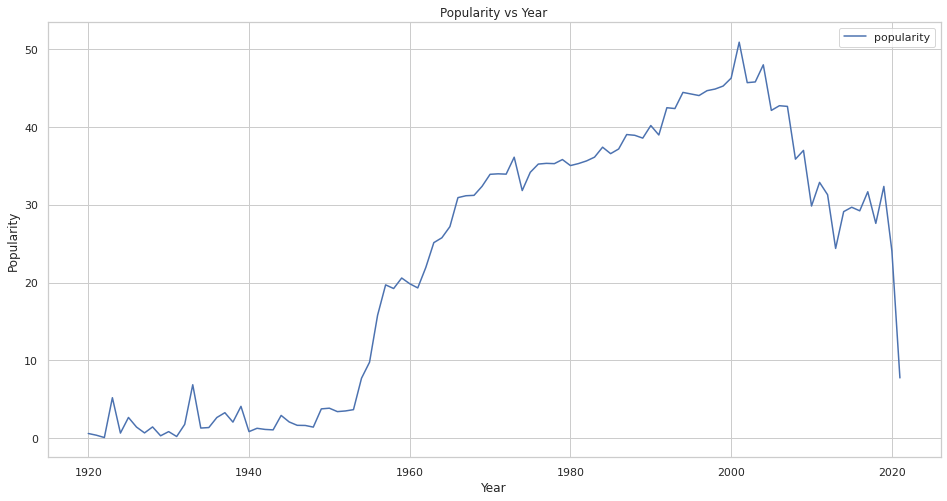

In [ ]:
signifance=0.05
popular_group = sample1["year"]
other_group = sample2["year"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=popular_group, b=other_group, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis.Release date affects popularity")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. Release date does not affect popularity.")

P value:  0.00E+00
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis.Release date affects popularity


**We reject the null hytpothesis. Release date affects popularity. Older tracks are listened less and the newer tracks are listened more.**

##Statistical tests to compare different eras

###Comparing 1950's &1960's with 1970's 1980's

In [ ]:
fifties_sixties=df4[(1950<=df4["year"]) & (df4["year"]<=1969)]
seventies_eigthies=df4[(1970<=df4["year"]) & (df4["year"]<=1989)]

**1950's-1960's energy vs 1970's-1980's energy**

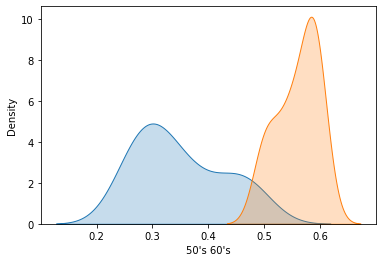

There seems that there is a jump in energies in energy in 1970's and 1980's. Lets apply T-test

**Null Hypothesis ($H_0$)**: The change in mean of energy is due to chance.

**Alternative Hypothesis ($H_A$)**: The mean of energy in 1950's & 1960's is different than 1970's and 1980's and they are not due to chance.

In [ ]:
signifance=0.05
fif_six = fifties_sixties["energy"]
sev_eig = seventies_eigthies["energy"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=fif_six, b=sev_eig, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of energies are different")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. The differnece in mean of energies are due to chance.")

P value:  1.84E-11
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of energies are different


**We reject the null hypothesis. The mean of energies are different for 1950's & 1960's and 1970's and 1980's. This jump can be explained with our research: 1970's and 1980's represent departure from the rock & roll and R&B hits of the 50s and 60s. to disco and disco-funk era, therefore the energy increased.**

###Comparing 1950's and 1960's

In [ ]:
fifties=df4[(1950<=df4["year"]) & (df4["year"]<1960)]
sixties=df4[(1960<=df4["year"]) & (df4["year"]<1970)]

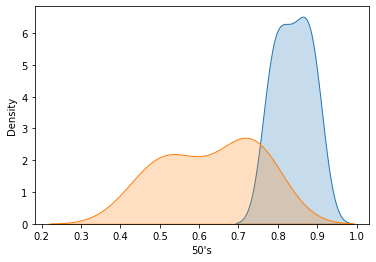

**The pink graph belongs to 1960's and the blue one belongs to 1950's, It can be seen that 1960's acousticness was lower**

There seems that there is a drop of acousticness after 1950's. Let's apply T-test

**Null Hypothesis ($H_0$)**: The change in mean of acousticness is due to chance.

**Alternative Hypothesis ($H_A$)**: The mean of acousticness in 1950's is different than 1960's and they are not due to chance.

In [ ]:
signifance=0.05
fif = fifties["acousticness"]
six = sixties["acousticness"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=fif_six, b=sev_eig, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of acousticness are different")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. The difference in mean of acousticnes are due to chance.")

P value:  1.84E-11
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of acousticness are different


**We reject the null hypothesis. The difference in mean of acousticnes are not due to chance. This can be explained. From our research: The decrease in acousticness in 1960's can be explained with amplifiers and electric guitars becoming popular in 1960's. Acousticness is a measureument of acoustic means. For example voice and acoustic instruments that are not electronically synthesized.Acousticness decreased in 1960's unsuprisingly with the introduction of electric guitars, distortions, synthesizers and auto-tuned vocals.**

###Analyzing The Change in Rock Genre by comparing 1970's and 1990's

In [ ]:
data=df
import re
data['artists'] = data['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))

data = data.explode('artists')

merged = pd.merge(data, df5, on="artists")

merged['genres'] = merged['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))

merged = merged.explode('genres')

In [ ]:
sample_rock = merged[merged.genres == 'rock']
rock_70=sample_rock[(1970<=sample_rock["year"]) & (sample_rock["year"]<=1979)]
rock_90=sample_rock[(1990<=sample_rock["year"]) & (sample_rock["year"]<=1999)]

rock_70=rock_70.dropna()
rock_90=rock_90.dropna()

print("70's acousticness mean: ",rock_70.acousticness_x.mean())
print("90's acousticness mean: ",rock_90.acousticness_x.mean())

70's acousticness mean:  0.29657749859585164
90's acousticness mean:  0.13866955561531394


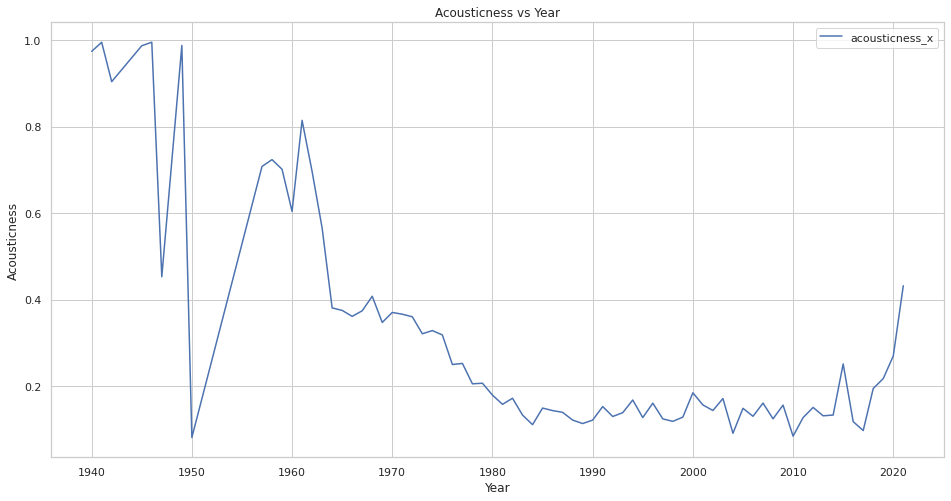

We can see the decrease in acousticness in the rock music from 1970's to 1990's. Let's apply statistical tests.

**Null Hypothesis ($H_0$)**: The change in mean of acousticness in rock genre in years 1970's and 1990's are due to chance.

**Alternative Hypothesis ($H_A$)**: The mean of acousticness in 1970's rock & 1990's rock is different they are not due to chance.

In [ ]:
signifance=0.05
sev = rock_70["acousticness_x"]
nin = rock_90["acousticness_x"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=sev, b=nin, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of acousticness are different")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. The differnece in mean of acousticness are due to chance.")

P value:  3.45E-187
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of acousticness are different


We accept the alternative hypothesis. The mean of acousticness in 1970's rock & 1990's rock is different they are not due to chance. This can be explained with again amplifiers and electric guitars becoming popular as the technology develops.

**Analyze energy for rock genre 1970's and 1990's**

In [ ]:
print("Rock 1970's energy mean: ",rock_70.energy_x.mean())
print("Rock 1990's energy mean: ",rock_90.energy_x.mean())

Rock 1970's energy mean:  0.5956646746076218
Rock 1990's energy mean:  0.7167961039805535


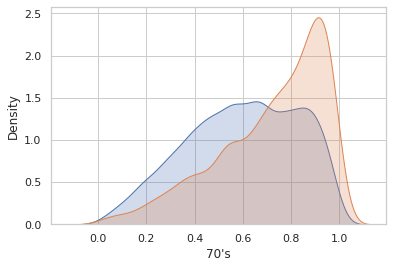

It looks like rock in 1990's were more energetic, let's apply statistical tests

**Null Hypothesis ($H_0$)**: The change in mean of energys in rock genre in years 1970's and 1990's are due to chance.

**Alternative Hypothesis ($H_A$)**: The mean of energy in 1970's rock & 1990's rock is different they are not due to chance.

In [ ]:
signifance=0.05
sev = rock_70["energy_x"]
nin = rock_90["energy_x"]
#ttest_ind if we are comparing means of two independent samples (Two Samples t-Test)
_, p_value = stats.ttest_ind(a=sev, b=nin, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance value:", signifance)
if (p_value < signifance):
  print("Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of energy are different")
else:
   print("Since p value is larger than the signigicance value,we fail to reject the null hypothesis. The differnece in mean of energy are due to chance.")

P value:  5.12E-138
Signifance value: 0.05
Since p value is smaller than the signigicance value, we reject the null hypothesis. The mean of energy are different


We accept the alternative Hypothesis.The mean of energy in 1970's rock & 1990's rock is different they are not due to chance. This can be explained from our research. Punk rock dominate the era 70's. Punk rock was insurrectionist, rebellious , dark and screechy. It was disdainful of authority and traditions. Examples are The Ramones and the Sex Pistols On the other hand, alternative rock dominated the era 90's. It was sentimental and deep. Examples are Nirvana and Red hot Chilli Peppers. Therefore the energy of alternative rock can be higher than punk rock.

###Technology Affects

**In this section we want to see how world wide web(1990) and TV(1950) affacted the music industy.**

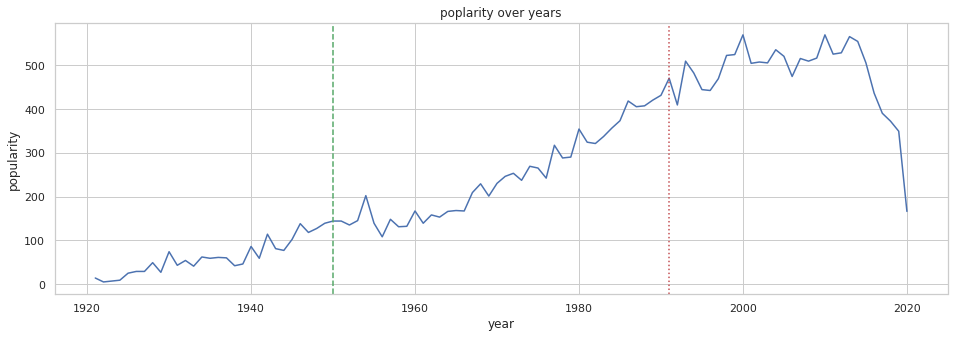

**We plotted a tick which corresponds to 1950's 1990's popularity. We consider these years as technological leap years**

**By applying chi-square, we observe that Technology and popularity are dependant.**

#Machine Learning

##Predicting Song Popularity

**We will make 3 models, Linear Regression, Decision Tree Regressor and Random Forest Regressor, we will try to increase the performance of our models**

###Predicting Song Popularity Using Linear Regression

**We first prepared our data, we got rid of null values and duplicates and we convert string columns to integer so that we can use Regression Models. We then use StandardScaler() function from sklearn.preprocessing library. And lastly we deleted string columns such as id, name and artists so that our Regression models can work**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = df.dropna()
df = df[df.notnull()]
df = df.drop_duplicates()

df['release_date'] = df['release_date'].str.slice(0, 4)
df['release_date'] = df['release_date'].astype(int)

del df['id']
del df['name']
del df['artists']

In [ ]:
X= df.loc[:,df.columns!='popularity']
y= df.loc[:,df.columns=='popularity']

sc_X= StandardScaler()
sc_y= StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

**We split the data to 3 parts: Train, Test and Validation. %80 for training and %10 %10 for test and validation**

In [ ]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X,y,test_size=0.20, random_state=0)
x_valid, x_test, y_val, y_test = train_test_split(X_test_valid, y_test_valid, test_size = 0.5, random_state = 0)

**The output from Linear Regression Model was:**
<br>Mean Absolute Error: 0.6041158315607807
<br>Mean Squared Error: 0.6240750782685983
<br>Root Mean Squared Error: 0.7899842265948088

**We use Lasso Regressor and Ridge Regressor to enhance our Linear Regression Model, the results was:**
<br>Mean Absolute Error Lasso Regressor: 0.6022195765154538
<br>Mean Squared Erro Lasso Regressor: 0.619468244764171
<br>Root Mean Squared Error Lasso Regressor: 0.7870630500564557
 
<br>Mean Absolute Error Ridge Regressor: 0.6023820401035753
<br>Mean Squared Error: Ridge Regressor 0.6194655743831317
<br>Root Mean Squared Error Ridge Regressor: 0.7870613536333312

###Predicting Song Popularity Using Decision Tree Regressor

**<br>Checking the accuracy of Decision Tree**
<br>Mean Absolute Error: 0.4923380985334887
<br>Mean Squared Error: 0.6424406780375278
<br>Root Mean Squared Error: 0.8015239722163822

We used GridSearchCV to obtain best parameters,we obtained parameters: Best Parameters :  **{'max_depth': 11, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}** 

**With using best parameters the results was:**
<br>Mean Absolute Error: 0.39998215279305865
<br>Mean Squared Error: 0.38456988377663687
<br>Root Mean Squared Error: 0.6201369879120555

###Predicting Song Popularity Using RandomForest Regressor

**The results using RandomForestRegressor was:**
<br>Mean Absolute Error: 0.3777403998737216
<br>Mean Squared Error: 0.3176578890843106
<br>Root Mean Squared Error: 0.5636114699722767

We again used GridSearchCv to obtain best parameters, the best parameters were: **{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}**

**By using best parameters, the results were:**
<br>Checking the accuracy of Random Forest with Best Parameters
<br>Mean Absolute Error: 0.3803275980032215
<br>Mean Squared Error: 0.3177496957871293
<br>Root Mean Squared Error: 0.5636929091155302

**We conclude that Best Model was Random Forest Regressor for predicting Song Popularity**

##Song recommendation

Song recommendation works on a method which detects the closest points of clustered data to the input. The recommendation is done by taking a number of inputs and outputting the recommended songs after the inputs are examined by this method.

#Conclusion

**To sum up, we made simple Data Analysis. Our important findings were that the popularity of a song is positively corralated with energy, negatively correlated with acousticness. Also, old tracks tend to be less popular. We further analyzed technology affects on popularity of songs (world wide web(1920) an TV(1950)). We conclude that technological leaps affected popularity of tracks. We proved them by making statistical tests mainly T-test and chi-square test. We tried to explain the reasons behind by making researches. Also, we observed by time series that acousticness of songs decrease, explicit content increases and energy, danceability, loudness of songs increase. We discovered most popular artists, genres and tracks. We obtained that best model for predicting the popularity of a song was Random Forest Regressor. Laslty, we build a song recommendation model which takes input of N songs and outputs a list of N songs**